<a href="https://colab.research.google.com/github/adityasobika/a/blob/main/amzn_lstm_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import pandas_datareader.data as web
import plotly.express as px
import plotly.graph_objects as go

# Dataset uploading

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving amazondata.csv to amazondata.csv


In [ ]:
amzn_data= pd.read_csv('amazondata.csv')
amzn_data.head()

,Date,Close,Volume,Open,High,Low
0,06-09-2021,$3281.15,2455530,$3272.87,$3297.58,$3270.7
1,06-08-2021,$3264.11,3416730,$3222.61,$3279.5321,$3218.01
2,06-07-2021,$3198.01,2215756,$3197.33,$3208,$3172.2
3,06-04-2021,$3206.22,2249749,$3212,$3221,$3198.81
4,06-03-2021,$3187.01,2398293,$3204.23,$3214.435,$3184.03


# Date parsing

In [ ]:
amzn_data['Date']= pd.to_datetime(amzn_data['Date'])
amzn_data['Date']= pd.to_datetime(amzn_data['Date'].dt.strftime("%m/%d/%Y"))
print(amzn_data)

           Date     Close   Volume      Open        High       Low
0    2021-06-09  $3281.15  2455530  $3272.87    $3297.58   $3270.7
1    2021-06-08  $3264.11  3416730  $3222.61  $3279.5321  $3218.01
2    2021-06-07  $3198.01  2215756  $3197.33       $3208   $3172.2
3    2021-06-04  $3206.22  2249749     $3212       $3221  $3198.81
4    2021-06-03  $3187.01  2398293  $3204.23   $3214.435  $3184.03
...         ...       ...      ...       ...         ...       ...
2511 2011-06-16   $183.65  6025431   $185.74        $187   $181.59
2512 2011-06-15   $185.98  6310918   $188.04     $192.45    $185.3
2513 2011-06-14   $189.96  3952911   $188.99     $190.72   $187.07
2514 2011-06-13   $186.29  3867735   $186.81     $189.31   $184.86
2515 2011-06-10   $186.53  3753267   $189.25     $190.77   $186.28

[2516 rows x 6 columns]


# removing $

In [ ]:
amzn_data['Close']= amzn_data['Close'].str.replace('$','')
amzn_data['Open']= amzn_data['Open'].str.replace('$','')
amzn_data['High']= amzn_data['High'].str.replace('$','')
amzn_data['Low']= amzn_data['Low'].str.replace('$','')
print(amzn_data)

           Date    Close   Volume     Open       High      Low
0    2021-06-09  3281.15  2455530  3272.87    3297.58   3270.7
1    2021-06-08  3264.11  3416730  3222.61  3279.5321  3218.01
2    2021-06-07  3198.01  2215756  3197.33       3208   3172.2
3    2021-06-04  3206.22  2249749     3212       3221  3198.81
4    2021-06-03  3187.01  2398293  3204.23   3214.435  3184.03
...         ...      ...      ...      ...        ...      ...
2511 2011-06-16   183.65  6025431   185.74        187   181.59
2512 2011-06-15   185.98  6310918   188.04     192.45    185.3
2513 2011-06-14   189.96  3952911   188.99     190.72   187.07
2514 2011-06-13   186.29  3867735   186.81     189.31   184.86
2515 2011-06-10   186.53  3753267   189.25     190.77   186.28

[2516 rows x 6 columns]


# finding outlier

In [ ]:
amzn_data[['Close','Open','High','Low']] =amzn_data[['Close','Open','High','Low']].apply(pd.to_numeric)
amzn_data.dtypes

Date      datetime64[ns]
Close            float64
Volume             int64
Open             float64
High             float64
Low              float64
dtype: object

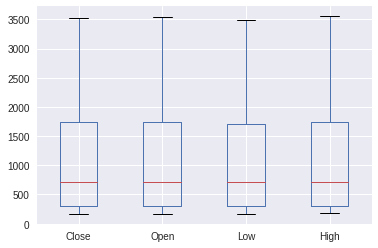

In [ ]:
amzn_data.boxplot(column=['Close','Open','Low','High'])
plt.show()

By the above graph it is unterstood that there are no outliers in all the variables adopted in historical data.


# Visualization

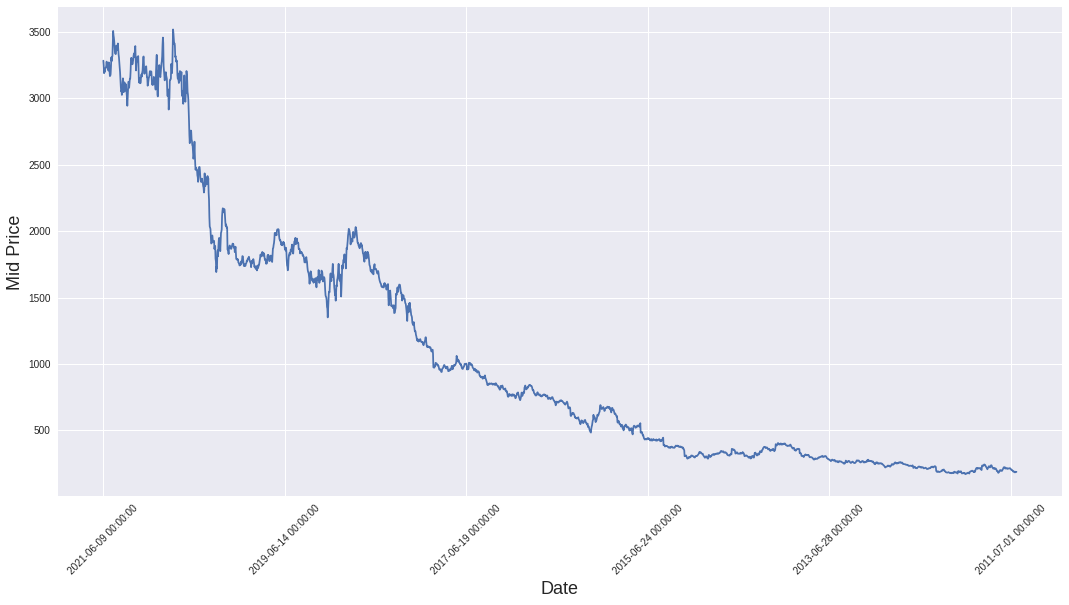

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(amzn_data.shape[0]),(amzn_data['Low']+amzn_data['High'])/2.0)
plt.xticks(range(0,amzn_data.shape[0],500),amzn_data['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [ ]:
import seaborn as sns

<Figure size 720x360 with 0 Axes>

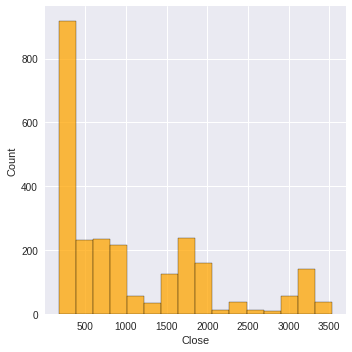

In [ ]:
plt.figure(figsize=(10,5))
sns.displot(amzn_data['Close'], color ='orange')
plt.show()

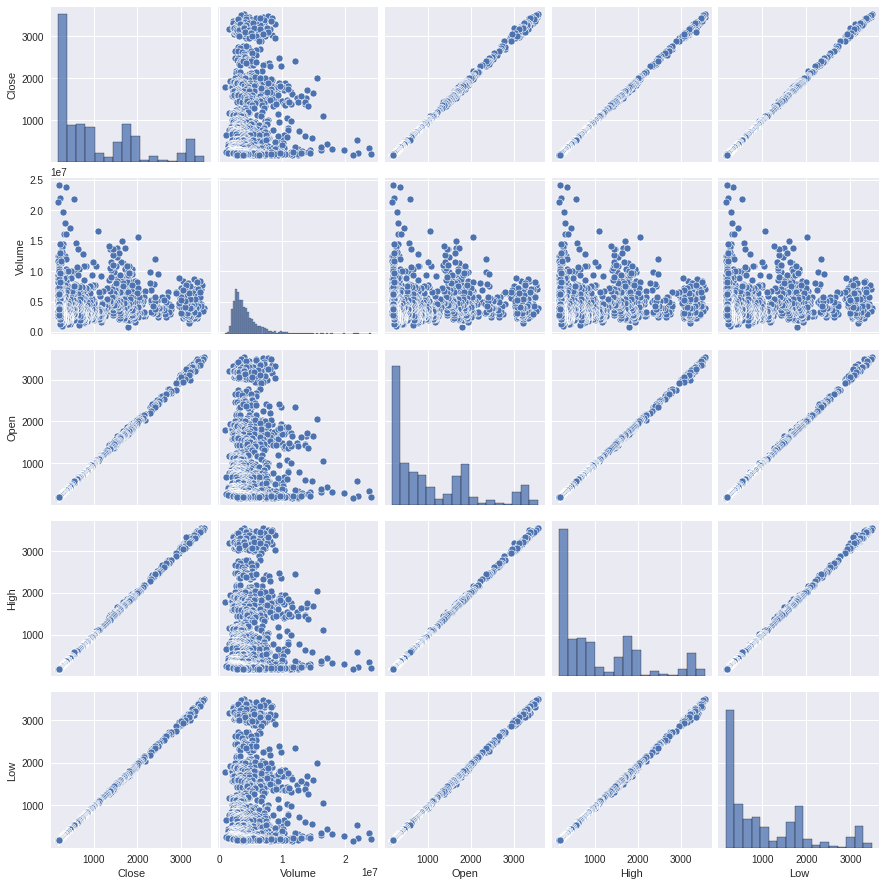

In [ ]:
sns.pairplot(amzn_data)

In [ ]:
from google.colab import files
uploaded= files.upload()


Saving 2015.csv to 2015.csv
Saving 2016.csv to 2016.csv
Saving 2017.csv to 2017.csv
Saving 2018.csv to 2018.csv
Saving 2019.csv to 2019.csv
Saving 2020.csv to 2020.csv
Saving 2021.csv to 2021.csv


In [ ]:
import io
df2015=pd.read_csv(io.BytesIO(uploaded['2015.csv']))
df2016=pd.read_csv(io.BytesIO(uploaded['2016.csv']))
df2017=pd.read_csv(io.BytesIO(uploaded['2017.csv']))
df2018=pd.read_csv(io.BytesIO(uploaded['2018.csv']))
df2019=pd.read_csv(io.BytesIO(uploaded['2019.csv']))
df2020=pd.read_csv(io.BytesIO(uploaded['2020.csv']))
df2021=pd.read_csv(io.BytesIO(uploaded['2021.csv']))

In [ ]:
amzn_his_data= pd.concat([df2015, df2016, df2017, df2018, df2019, df2020, df2021])

In [ ]:
del amzn_his_data['Date ']

In [ ]:
amzn_his_data.head()

,Date,Heading
0,02-01-2015,What to expect from Apple in 2015 beyond its s...
1,05-01-2015,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."
2,06-01-2015,"Technology Transforming Cars Into ""Phones On W..."
3,07-01-2015,Apple issues fourth developer beta of OS X 10....
4,08-01-2015,Apple company recalls 2014 shipments after lin...


In [ ]:
amzn_his_data['Date']=pd.to_datetime(amzn_his_data['Date'])

In [ ]:
amzn_his_data.dtypes

Date       datetime64[ns]
Heading            object
dtype: object

# merging files

In [ ]:
amzn_eda= pd.merge(amzn_data,amzn_his_data, on=['Date'], how= 'outer')
amzn_eda



,Date,Close,Volume,Open,High,Low,Heading
0,2021-06-09,3281.15,2455530.0,3272.87,3297.5800,3270.70,NaN
1,2021-06-08,3264.11,3416730.0,3222.61,3279.5321,3218.01,NaN
2,2021-06-07,3198.01,2215756.0,3197.33,3208.0000,3172.20,NaN
3,2021-06-04,3206.22,2249749.0,3212.00,3221.0000,3198.81,This Simple Stock Market Strategy Is Winning s...
4,2021-06-03,3187.01,2398293.0,3204.23,3214.4350,3184.03,NaN
...,...,...,...,...,...,...,...
3033,2021-06-19,NaN,NaN,NaN,NaN,NaN,Best pre-Prime Day smartwatch deals on Apple W...
3034,2021-06-20,NaN,NaN,NaN,NaN,NaN,iPhone 13 rumors: As Apple's fall event gets c...
3035,2021-06-21,NaN,NaN,NaN,NaN,NaN,Apple is shortening new free TV Plus trials fr...
3036,2021-06-22,NaN,NaN,NaN,NaN,NaN,Google likely to soon face antitrust claims ov...


# Filling missing values

In [ ]:
amzn_eda.isnull().sum()

Date        207
Close       505
Volume      505
Open        505
High        505
Low         505
Heading    2140
dtype: int64

In [ ]:
amzn_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3038 entries, 0 to 3037
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2831 non-null   datetime64[ns]
 1   Close    2533 non-null   float64       
 2   Volume   2533 non-null   float64       
 3   Open     2533 non-null   float64       
 4   High     2533 non-null   float64       
 5   Low      2533 non-null   float64       
 6   Heading  898 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 189.9+ KB


In [ ]:
amzn_eda['Close']= amzn_eda['Close'].fillna(amzn_eda['Close'].mean())
amzn_eda['Open']= amzn_eda['Open'].fillna(amzn_eda['Open'].mean())
amzn_eda['Low']= amzn_eda['Low'].fillna(amzn_eda['Low'].mean())
amzn_eda['High']= amzn_eda['High'].fillna(amzn_eda['High'].mean())
amzn_eda['Volume']= amzn_eda['Volume'].fillna(amzn_eda['Volume'].mean())
amzn_eda

,Date,Close,Volume,Open,High,Low,Heading
0,2021-06-09,3281.1500,2.455530e+06,3272.870000,3297.580000,3270.700000,NaN
1,2021-06-08,3264.1100,3.416730e+06,3222.610000,3279.532100,3218.010000,NaN
2,2021-06-07,3198.0100,2.215756e+06,3197.330000,3208.000000,3172.200000,NaN
3,2021-06-04,3206.2200,2.249749e+06,3212.000000,3221.000000,3198.810000,This Simple Stock Market Strategy Is Winning s...
4,2021-06-03,3187.0100,2.398293e+06,3204.230000,3214.435000,3184.030000,NaN
...,...,...,...,...,...,...,...
3033,2021-06-19,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Best pre-Prime Day smartwatch deals on Apple W...
3034,2021-06-20,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,iPhone 13 rumors: As Apple's fall event gets c...
3035,2021-06-21,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Apple is shortening new free TV Plus trials fr...
3036,2021-06-22,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Google likely to soon face antitrust claims ov...


In [ ]:
amzn_mod= amzn_eda.dropna()
amzn_mod

,Date,Close,Volume,Open,High,Low,Heading
3,2021-06-04,3206.2200,2.249749e+06,3212.000000,3221.000000,3198.810000,This Simple Stock Market Strategy Is Winning s...
5,2021-06-02,3233.9900,2.014524e+06,3223.100000,3235.000000,3208.000000,Exclusive Social Media App Clubhouse Rises In ...
7,2021-05-28,3223.0700,2.331509e+06,3242.000000,3247.990000,3219.700000,Apple pushes back launch of podcast subscripti...
8,2021-05-27,3230.1100,2.561157e+06,3256.000000,3260.355000,3230.040000,&quot;Friends: The Reunion&quot;: The Best Non...
9,2021-05-26,3265.1600,2.383986e+06,3274.591000,3295.730000,3258.510000,Microsoft Build: The Real Difference Between M...
...,...,...,...,...,...,...,...
3033,2021-06-19,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Best pre-Prime Day smartwatch deals on Apple W...
3034,2021-06-20,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,iPhone 13 rumors: As Apple's fall event gets c...
3035,2021-06-21,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Apple is shortening new free TV Plus trials fr...
3036,2021-06-22,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Google likely to soon face antitrust claims ov...


In [ ]:
amzn_mod.shape

(691, 9)

In [ ]:
amzn_mod.set_index('Date', inplace= True)
amzn_mod

,level_0,index,Close,Volume,Open,High,Low,Heading
Date,,,,,,,,
2021-06-04,0,3,3206.2200,2.249749e+06,3212.000000,3221.000000,3198.810000,This Simple Stock Market Strategy Is Winning s...
2021-06-02,1,5,3233.9900,2.014524e+06,3223.100000,3235.000000,3208.000000,Exclusive Social Media App Clubhouse Rises In ...
2021-05-28,2,7,3223.0700,2.331509e+06,3242.000000,3247.990000,3219.700000,Apple pushes back launch of podcast subscripti...
2021-05-27,3,8,3230.1100,2.561157e+06,3256.000000,3260.355000,3230.040000,&quot;Friends: The Reunion&quot;: The Best Non...
2021-05-26,4,9,3265.1600,2.383986e+06,3274.591000,3295.730000,3258.510000,Microsoft Build: The Real Difference Between M...
...,...,...,...,...,...,...,...,...
2021-06-19,686,3033,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Best pre-Prime Day smartwatch deals on Apple W...
2021-06-20,687,3034,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,iPhone 13 rumors: As Apple's fall event gets c...
2021-06-21,688,3035,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Apple is shortening new free TV Plus trials fr...


In [ ]:
amzn_mod.sort_index(ascending=True, inplace=True)
amzn_mod

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,level_0,index,Close,Volume,Open,High,Low,Heading
Date,,,,,,,,
2015-01-04,398,2538,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Apple Daily: Retina MacBook Unboxing Video; Ap...
2015-01-08,392,1632,300.4600,3.087475e+06,300.320000,303.140000,296.110000,Nomura Begins Coverage on Apple (AAPL) IBM cou...
2015-01-09,391,1631,296.9300,2.589914e+06,301.480000,302.870000,296.680000,Google&quot;s (GOOGL) Self-Driving Cars to Hit...
2015-01-10,409,2549,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Apple Initiated Buy With $200 PT At Drexel Ham...
2015-01-11,412,2552,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Does An Apple Watch Discount Point To Flagging...
...,...,...,...,...,...,...,...,...
2021-12-03,660,3007,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,How to cancel an Apple One subscription once y...
2021-12-03,659,3006,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,How to cancel an Apple One subscription once y...
2021-12-04,665,3012,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Microsoft Boosts Conversational AI with $19.7 ...


In [ ]:
del amzn_mod['index']
amzn_mod

,level_0,Close,Volume,Open,High,Low,Heading
Date,,,,,,,
2015-01-04,398,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Apple Daily: Retina MacBook Unboxing Video; Ap...
2015-01-08,392,300.4600,3.087475e+06,300.320000,303.140000,296.110000,Nomura Begins Coverage on Apple (AAPL) IBM cou...
2015-01-09,391,296.9300,2.589914e+06,301.480000,302.870000,296.680000,Google&quot;s (GOOGL) Self-Driving Cars to Hit...
2015-01-10,409,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Apple Initiated Buy With $200 PT At Drexel Ham...
2015-01-11,412,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Does An Apple Watch Discount Point To Flagging...
...,...,...,...,...,...,...,...
2021-12-03,660,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,How to cancel an Apple One subscription once y...
2021-12-03,659,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,How to cancel an Apple One subscription once y...
2021-12-04,665,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Microsoft Boosts Conversational AI with $19.7 ...


# Sentimental analysis



In [ ]:
import os

In [ ]:
os.getcwd()

'/content'

In [ ]:
amzn_mod['compound']=''
amzn_mod['negative']=''
amzn_mod['neutral']=''
amzn_mod['positive']=''
amzn_mod

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,level_0,Close,Volume,Open,High,Low,Heading,compound,negative,neutral,positive
Date,,,,,,,,,,,
2015-01-04,398,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Apple Daily: Retina MacBook Unboxing Video; Ap...,,,,
2015-01-08,392,300.4600,3.087475e+06,300.320000,303.140000,296.110000,Nomura Begins Coverage on Apple (AAPL) IBM cou...,,,,
2015-01-09,391,296.9300,2.589914e+06,301.480000,302.870000,296.680000,Google&quot;s (GOOGL) Self-Driving Cars to Hit...,,,,
2015-01-10,409,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Apple Initiated Buy With $200 PT At Drexel Ham...,,,,
2015-01-11,412,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Does An Apple Watch Discount Point To Flagging...,,,,
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-03,660,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,How to cancel an Apple One subscription once y...,,,,
2021-12-03,659,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,How to cancel an Apple One subscription once y...,,,,
2021-12-04,665,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Microsoft Boosts Conversational AI with $19.7 ...,,,,


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

In [ ]:
sd=  SentimentIntensityAnalyzer()

In [ ]:
amzn_mod['compound']=amzn_mod['Heading'].apply(lambda x: sd.polarity_scores(x)['compound'])
amzn_mod['positive']=amzn_mod['Heading'].apply(lambda x: sd.polarity_scores(x)['pos'])
amzn_mod['negative']=amzn_mod['Heading'].apply(lambda x: sd.polarity_scores(x)['neg'])
amzn_mod['neutral']=amzn_mod['Heading'].apply(lambda x: sd.polarity_scores(x)['neu'])
amzn_mod

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,level_0,Close,Volume,Open,High,Low,Heading,compound,negative,neutral,positive
Date,,,,,,,,,,,
2015-01-04,398,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Apple Daily: Retina MacBook Unboxing Video; Ap...,0.9900,0.039,0.863,0.098
2015-01-08,392,300.4600,3.087475e+06,300.320000,303.140000,296.110000,Nomura Begins Coverage on Apple (AAPL) IBM cou...,0.4939,0.059,0.827,0.114
2015-01-09,391,296.9300,2.589914e+06,301.480000,302.870000,296.680000,Google&quot;s (GOOGL) Self-Driving Cars to Hit...,0.9107,0.084,0.806,0.110
2015-01-10,409,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Apple Initiated Buy With $200 PT At Drexel Ham...,0.9268,0.060,0.848,0.092
2015-01-11,412,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Does An Apple Watch Discount Point To Flagging...,0.8290,0.045,0.840,0.115
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-03,660,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,How to cancel an Apple One subscription once y...,0.9964,0.035,0.847,0.117
2021-12-03,659,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,How to cancel an Apple One subscription once y...,0.9964,0.035,0.847,0.117
2021-12-04,665,1073.5905,4.202192e+06,1074.084557,1085.290177,1061.333931,Microsoft Boosts Conversational AI with $19.7 ...,0.9792,0.055,0.866,0.079


In [ ]:
amzn_mod.columns

Index(['level_0', 'Close', 'Volume', 'Open', 'High', 'Low', 'Heading',
       'compound', 'negative', 'neutral', 'positive'],
      dtype='object')

In [ ]:
amzn_mod= amzn_mod[['Close','compound','negative','neutral','positive','Open','High','Low','Volume']]
amzn_mod

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2015-01-04,1073.5905,0.9900,0.039,0.863,0.098,1074.084557,1085.290177,1061.333931,4.202192e+06
2015-01-08,300.4600,0.4939,0.059,0.827,0.114,300.320000,303.140000,296.110000,3.087475e+06
2015-01-09,296.9300,0.9107,0.084,0.806,0.110,301.480000,302.870000,296.680000,2.589914e+06
2015-01-10,1073.5905,0.9268,0.060,0.848,0.092,1074.084557,1085.290177,1061.333931,4.202192e+06
2015-01-11,1073.5905,0.8290,0.045,0.840,0.115,1074.084557,1085.290177,1061.333931,4.202192e+06
...,...,...,...,...,...,...,...,...,...
2021-12-03,1073.5905,0.9964,0.035,0.847,0.117,1074.084557,1085.290177,1061.333931,4.202192e+06
2021-12-03,1073.5905,0.9964,0.035,0.847,0.117,1074.084557,1085.290177,1061.333931,4.202192e+06
2021-12-04,1073.5905,0.9792,0.055,0.866,0.079,1074.084557,1085.290177,1061.333931,4.202192e+06


# data preparation

In [ ]:
amznstockdata= amzn_mod.to_csv('amznstockdata.csv')

In [ ]:
amznstockdata= pd.read_csv('amznstockdata.csv', index_col=False)
amznstockdata.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
amznstockdata.set_index('Date', inplace=True)
amznstockdata

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2015-01-04,1073.5905,0.9900,0.039,0.863,0.098,1074.084557,1085.290177,1061.333931,4.202192e+06
2015-01-08,300.4600,0.4939,0.059,0.827,0.114,300.320000,303.140000,296.110000,3.087475e+06
2015-01-09,296.9300,0.9107,0.084,0.806,0.110,301.480000,302.870000,296.680000,2.589914e+06
2015-01-10,1073.5905,0.9268,0.060,0.848,0.092,1074.084557,1085.290177,1061.333931,4.202192e+06
2015-01-11,1073.5905,0.8290,0.045,0.840,0.115,1074.084557,1085.290177,1061.333931,4.202192e+06
...,...,...,...,...,...,...,...,...,...
2021-12-03,1073.5905,0.9964,0.035,0.847,0.117,1074.084557,1085.290177,1061.333931,4.202192e+06
2021-12-03,1073.5905,0.9964,0.035,0.847,0.117,1074.084557,1085.290177,1061.333931,4.202192e+06
2021-12-04,1073.5905,0.9792,0.055,0.866,0.079,1074.084557,1085.290177,1061.333931,4.202192e+06


In [ ]:
amznstockdata.shape


(691, 9)

In [ ]:
amznstockdata.isna().any()

Close       False
compound    False
negative    False
neutral     False
positive    False
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [ ]:
amznstockdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 2015-01-04 to 2021-12-06
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     691 non-null    float64
 1   compound  691 non-null    float64
 2   negative  691 non-null    float64
 3   neutral   691 non-null    float64
 4   positive  691 non-null    float64
 5   Open      691 non-null    float64
 6   High      691 non-null    float64
 7   Low       691 non-null    float64
 8   Volume    691 non-null    float64
dtypes: float64(9)
memory usage: 74.0+ KB


In [ ]:
amznstockdata.describe(include='all')

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,6.910000e+02
mean,1419.064022,0.639964,0.054677,0.844336,0.100994,1419.226473,1434.863704,1402.650127,4.220032e+06
std,842.415213,0.614584,0.033794,0.042580,0.033682,843.838711,853.868213,832.920440,1.863320e+06
min,286.950000,-0.999500,0.000000,0.674000,0.000000,286.280000,290.790000,285.250000,8.813370e+05
25%,1073.590500,0.647550,0.032500,0.823500,0.079000,1074.084557,1085.290177,1061.333931,3.319038e+06
50%,1073.590500,0.958000,0.049000,0.847000,0.098000,1074.084557,1085.290177,1061.333931,4.202192e+06
75%,1774.050000,0.991750,0.069000,0.869000,0.123500,1763.600000,1783.337550,1749.560000,4.202192e+06
max,3531.450000,0.999400,0.241000,0.978000,0.215000,3547.000000,3554.000000,3486.685000,2.384672e+07


In [ ]:
#data to be used for each column
close_price= amznstockdata.iloc[:,0]
#print close price
print("Close Price")
close_price

Close Price


Date
2015-01-04    1073.5905
2015-01-08     300.4600
2015-01-09     296.9300
2015-01-10    1073.5905
2015-01-11    1073.5905
                ...    
2021-12-03    1073.5905
2021-12-03    1073.5905
2021-12-04    1073.5905
2021-12-05    1073.5905
2021-12-06    1073.5905
Name: Close, Length: 691, dtype: float64

In [ ]:
#concatenating the captured train data into a df
need_data = pd.concat([close_price], axis=1)
#revised stock data column name
need_data.columns = ['close_price']
need_data.tail(15)

,close_price
Date,
2021-10-05,1073.5905
2021-10-06,1073.5905
2021-11-01,1073.5905
2021-11-02,1073.5905
2021-11-03,1073.5905
2021-11-03,1073.5905
2021-11-05,1073.5905
2021-11-06,1073.5905
2021-12-01,1073.5905


In [ ]:
#converting a numpy array
amzndataset= need_data.values

# Test & train split 

In [ ]:
#number of rows
training_data_len = math.ceil(len(amzndataset)*.8)
training_data_len

553

In [ ]:
#scaling the target data and featuring df
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(amzndataset)
print(amzndataset)

[[1073.59050016]
 [ 300.46      ]
 [ 296.93      ]
 [1073.59050016]
 [1073.59050016]
 [ 291.41      ]
 [ 294.74      ]
 [ 293.27      ]
 [ 286.95      ]
 [ 290.74      ]
 [ 289.44      ]
 [ 297.25      ]
 [ 303.91      ]
 [ 311.78      ]
 [ 354.53      ]
 [1073.59050016]
 [ 364.47      ]
 [ 370.56      ]
 [ 372.995     ]
 [ 377.17      ]
 [ 373.37      ]
 [ 380.14      ]
 [ 378.59      ]
 [ 384.8       ]
 [ 380.16      ]
 [ 385.655     ]
 [1073.59050016]
 [ 369.51      ]
 [ 366.37      ]
 [ 374.24      ]
 [1073.59050016]
 [ 371.92      ]
 [ 373.24      ]
 [ 378.49      ]
 [ 375.11      ]
 [ 374.09      ]
 [ 367.35      ]
 [ 370.56      ]
 [ 372.1       ]
 [ 372.25      ]
 [1073.59050016]
 [ 377.04      ]
 [1073.59050016]
 [1073.59050016]
 [ 385.11      ]
 [ 386.04      ]
 [ 391.18      ]
 [ 389.99      ]
 [ 445.1       ]
 [1073.59050016]
 [ 422.87      ]
 [1073.59050016]
 [1073.59050016]
 [ 421.19      ]
 [ 419.1       ]
 [1073.59050016]
 [1073.59050016]
 [ 432.85      ]
 [ 426.87     

In [ ]:
#training data set
train_data = scaler_data[0:training_data_len, :]

#spliting data into training sets
x_train =[]
y_train=[]
past_days= 15
for i in range(past_days, len(train_data)):
  x_train.append(train_data[i-past_days:i, :])
  y_train.append(train_data[i, 0])
  if i<= past_days:
    print(x_train)
    print(y_train)
    print()

[array([[0.24245354],
       [0.00416397],
       [0.00307597],
       [0.24245354],
       [0.24245354],
       [0.00137463],
       [0.00240099],
       [0.00194791],
       [0.        ],
       [0.00116813],
       [0.00076745],
       [0.0031746 ],
       [0.00522731],
       [0.00765295],
       [0.0208291 ]])]
[0.24245353680318]



In [135]:
#coverting train to numpy array
x_train, y_train= np.array(x_train), np.array(y_train)

In [136]:
#reshape the data to 3 dimension data
x_train= np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.24245354],
        [0.00416397],
        [0.00307597],
        ...,
        [0.00522731],
        [0.00765295],
        [0.0208291 ]],

       [[0.00416397],
        [0.00307597],
        [0.24245354],
        ...,
        [0.00765295],
        [0.0208291 ],
        [0.24245354]],

       [[0.00307597],
        [0.24245354],
        [0.24245354],
        ...,
        [0.0208291 ],
        [0.24245354],
        [0.02389274]],

       ...,

       [[0.9270057 ],
        [0.88238249],
        [0.91898906],
        ...,
        [0.84699337],
        [0.87854523],
        [0.86870396]],

       [[0.88238249],
        [0.91898906],
        [0.88432116],
        ...,
        [0.87854523],
        [0.86870396],
        [0.24245354]],

       [[0.91898906],
        [0.88432116],
        [0.24245354],
        ...,
        [0.86870396],
        [0.24245354],
        [0.24245354]]])

In [137]:
print(x_train.shape)
print(y_train.shape)

(538, 15, 1)
(538,)


In [138]:
np.random.seed(2000)
import keras.models
import tensorflow
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential

In [140]:
model = Sequential()
model.add(LSTM(160, return_sequences=True, activation="tanh", input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(80, return_sequences=False , activation="tanh"))
model.add(Dense(60))
model.add(Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 15, 160)           103680    
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 160)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 80)                77120     
_________________________________________________________________
dense_4 (Dense)              (None, 60)                4860      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 61        
Total params: 185,721
Trainable params: 185,721
Non-trainable params: 0
_________________________________________________________________


In [141]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [142]:
#train the model
from keras.callbacks import EarlyStopping
early_stop= EarlyStopping(monitor= 'val_loss', mode= 'min', verbose= 1, patience= 5)
history= model.fit(x_train, y_train, batch_size=64, epochs=100, verbose=1, validation_split=0.2, callbacks= [early_stop])

Epoch 1/100
7/7 [==============================] - 17s 242ms/step - loss: 0.0379 - val_loss: 0.0680
Epoch 2/100
7/7 [==============================] - 0s 56ms/step - loss: 0.0104 - val_loss: 0.0700
Epoch 3/100
7/7 [==============================] - 0s 55ms/step - loss: 0.0085 - val_loss: 0.0615
Epoch 4/100
7/7 [==============================] - 0s 56ms/step - loss: 0.0077 - val_loss: 0.0683
Epoch 5/100
7/7 [==============================] - 0s 55ms/step - loss: 0.0076 - val_loss: 0.0604
Epoch 6/100
7/7 [==============================] - 0s 55ms/step - loss: 0.0081 - val_loss: 0.0631
Epoch 7/100
7/7 [==============================] - 0s 56ms/step - loss: 0.0080 - val_loss: 0.0605
Epoch 8/100
7/7 [==============================] - 0s 59ms/step - loss: 0.0069 - val_loss: 0.0621
Epoch 9/100
7/7 [==============================] - 0s 55ms/step - loss: 0.0074 - val_loss: 0.0604
Epoch 10/100
7/7 [==============================] - 0s 55ms/step - loss: 0.0072 - val_loss: 0.0627
Epoch 11/100
7/7 

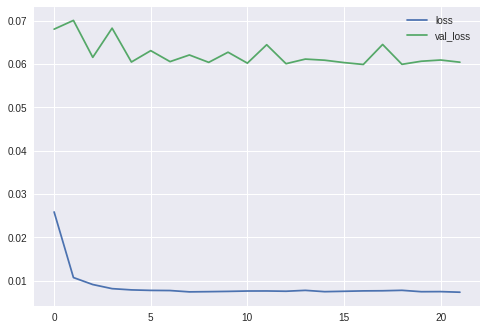

In [144]:
#plotting loss
loss= pd.DataFrame(model.history.history)
loss.plot()

In [148]:
#Creating the testing data set
test_data = scaler_data[training_data_len - past_days:, :]

#creating the datasets
x_test=[]
y_test= amzndataset[training_data_len:, 0]
for i in range (past_days, len(test_data)):
  x_test.append(test_data[i- past_days:i, :])

In [149]:
#convert the data to numpy array
x_test= np.array(x_test)

#reshaping the data
x_data= np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))


In [150]:
#get the model predicted price 
predictions= model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
predictions

array([[2235.3867],
       [2227.047 ],
       [2243.113 ],
       [2172.0828],
       [2187.3054],
       [2119.1514],
       [2089.422 ],
       [2036.4749],
       [1966.5464],
       [1995.5175],
       [1946.5845],
       [1879.9169],
       [1802.7653],
       [1773.4701],
       [1784.9779],
       [1773.6268],
       [1799.2308],
       [1909.3678],
       [2027.0913],
       [2091.019 ],
       [2169.3818],
       [2201.774 ],
       [2188.3298],
       [2253.367 ],
       [2274.2998],
       [2312.8887],
       [2311.4448],
       [2328.8618],
       [2364.3572],
       [2361.5085],
       [2376.6025],
       [2405.4434],
       [2394.5325],
       [2402.0293],
       [2424.3936],
       [2456.9607],
       [2446.9163],
       [2353.0496],
       [2288.7812],
       [2256.2761],
       [2304.437 ],
       [2360.7585],
       [2370.184 ],
       [2390.2373],
       [2418.2842],
       [2448.7034],
       [2479.758 ],
       [2560.5908],
       [2575.4084],
       [2548.61  ],


# RMSE value

In [152]:
rmse= np.sqrt(np.mean(predictions - y_test)**2)
print("RMSE =", rmse)

RMSE = 67.49121694087746


# Model prediction

In [154]:
#plot the data
import copy
valid= copy.deepcopy(amzn_mod[training_data_len:])
valid['Predictions']= predictions

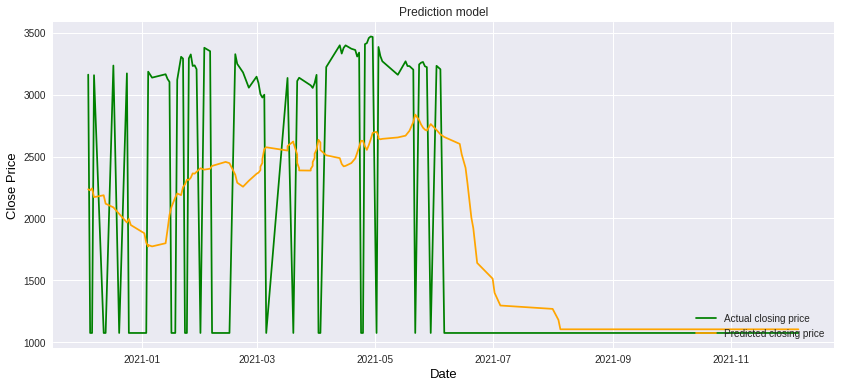

In [155]:
plt.figure(figsize=(14,6))
plt.title('Prediction model')
plt.xlabel('Date', fontsize = 13, color='black')
plt.ylabel('Close Price', fontsize=13, color='black')
plt.plot(valid['Close'], color='green', label= 'Actual closing price')
plt.plot(valid['Predictions'], color='orange', label= 'Predicted closing price')
plt.legend(loc= 'lower right', fontsize=10)
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
plt.show()

In [156]:
valid

,Close,compound,negative,neutral,positive,Open,High,Low,Volume,Predictions
Date,,,,,,,,,,
2020-12-04,3162.5800,0.1531,0.044,0.915,0.041,3198.210000,3198.210000,3158.760000,2.913611e+06,2235.386719
2020-12-05,1073.5905,0.9978,0.011,0.864,0.125,1074.084557,1085.290177,1061.333931,4.202192e+06,2227.047119
2020-12-06,1073.5905,0.9930,0.058,0.801,0.140,1074.084557,1085.290177,1061.333931,4.202192e+06,2243.113037
2020-12-07,3158.0000,0.8555,0.010,0.900,0.090,3156.480000,3180.760000,3141.690000,2.751316e+06,2172.082764
2020-12-12,1073.5905,0.9892,0.036,0.861,0.102,1074.084557,1085.290177,1061.333931,4.202192e+06,2187.305420
...,...,...,...,...,...,...,...,...,...,...
2021-12-03,1073.5905,0.9964,0.035,0.847,0.117,1074.084557,1085.290177,1061.333931,4.202192e+06,1103.264526
2021-12-03,1073.5905,0.9964,0.035,0.847,0.117,1074.084557,1085.290177,1061.333931,4.202192e+06,1103.264526
2021-12-04,1073.5905,0.9792,0.055,0.866,0.079,1074.084557,1085.290177,1061.333931,4.202192e+06,1103.264526
